In [2]:
%load_ext autoreload
%autoreload 2
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
from os.path import join as oj
import seaborn as sns
from tqdm import tqdm

In [13]:
results_dir = '/accounts/projects/vision/chandan/class-weight-uncertainty/results/pmlb'
os.makedirs(results_dir, exist_ok=True)
# depending on how much is saved, this may take a while
# /scratch/users/vision/chandan/pacmed/logistic_basic
# /scratch/users/vision/chandan/pacmed/logistic_refit
# out_dir = '/scratch/users/vision/chandan/pacmed/logistic_refit'
out_dir = '/scratch/users/vision/chandan/pacmed/mlp_sweep'
fnames = sorted([fname for fname in os.listdir(out_dir)])
results_list = [pd.Series(pkl.load(open(oj(out_dir, fname), "rb"))) for fname in tqdm(fnames)]
results = pd.concat(results_list, axis=1).T.infer_objects()

100%|██████████| 74/74 [00:00<00:00, 253.29it/s]


**note - cw is class-weight an pe is predictive-entropy**

In [14]:
results.head()

,dset_name,seed,class_weight,model_type,flip_frac,out_dir,pid,cw_flipped_diff_train,cw_flipped_diff_p_train,cw_loss_percentages_train,...,pe_flipped_diff_p_test,pe_loss_percentages_test,pe_loss_performances_test,pe_loss_auc_test,pe_auc_percentages_test,pe_auc_performances_test,pe_auc_auc_test,pe_calibration_pred_test,pe_calibration_true_test,pe_calibration_rmse_test
0,GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...,0,1,mlp2,0.1,/scratch/users/vision/chandan/pacmed/mlp_sweep,35448661348401848568,0.000177,0.214516,"[6.018518518518518, 6.111111111111111, 6.20370...",...,0.335664,"[18.055555555555557, 18.333333333333332, 18.61...","[338.8987979998044, 346.1778305494824, 346.187...",60229.386956,"[18.055555555555557, 18.333333333333332, 18.61...","[0.48538011695906436, 0.4877819548872181, 0.48...",35.733854,"[0.054773756509919155, 0.28753498311280423, 0....","[0.5486111111111112, 0.45161290322580644, 0.66...",0.347031
1,GAMETES_Epistasis_2-Way_20atts_0.1H_EDM-1_1,0,1,mlp2,0.1,/scratch/users/vision/chandan/pacmed/mlp_sweep,78018828581702282352,0.039999,0.010160,"[6.018518518518518, 6.111111111111111, 6.20370...",...,0.321459,"[18.055555555555557, 18.333333333333332, 18.61...","[167.24420215203617, 167.3357410836225, 167.42...",29845.811605,"[18.055555555555557, 18.333333333333332, 18.61...","[0.5478927203065135, 0.5527777777777778, 0.552...",47.421137,"[0.08588967021653644, 0.3028764848152098, 0.50...","[0.43434343434343436, 0.4406779661016949, 0.48...",0.222384
2,GAMETES_Epistasis_2-Way_20atts_0.4H_EDM-1_1,0,1,mlp2,0.1,/scratch/users/vision/chandan/pacmed/mlp_sweep,00412307376160028058,0.019768,0.100224,"[6.018518518518518, 6.111111111111111, 6.20370...",...,0.305251,"[18.055555555555557, 18.333333333333332, 18.61...","[121.7812062210355, 121.86771105227764, 121.95...",20685.169547,"[18.055555555555557, 18.333333333333332, 18.61...","[0.6388888888888888, 0.637037037037037, 0.6353...",58.082029,"[0.09038770756167074, 0.2894433354815808, 0.50...","[0.3069306930693069, 0.36507936507936506, 0.48...",0.122800
3,GAMETES_Epistasis_3-Way_20atts_0.2H_EDM-1_1,0,1,mlp2,0.1,/scratch/users/vision/chandan/pacmed/mlp_sweep,75400375182455550076,0.019041,0.145672,"[6.018518518518518, 6.111111111111111, 6.20370...",...,0.372147,"[18.055555555555557, 18.333333333333332, 18.61...","[167.6194589809582, 167.75050817935966, 167.88...",29967.190387,"[18.055555555555557, 18.333333333333332, 18.61...","[0.5640243902439025, 0.5570731707317074, 0.559...",41.009317,"[0.09453193804281587, 0.29262512139750535, 0.4...","[0.5777777777777777, 0.4794520547945205, 0.5, ...",0.303347
4,GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_...,0,1,mlp2,0.1,/scratch/users/vision/chandan/pacmed/mlp_sweep,13344040483848825543,0.033788,0.014025,"[6.018518518518518, 6.111111111111111, 6.20370...",...,0.412721,"[18.055555555555557, 18.333333333333332, 18.61...","[125.10334115781698, 125.17547557087696, 125.2...",21906.517597,"[18.055555555555557, 18.333333333333332, 18.61...","[0.6544401544401545, 0.6589002795899348, 0.663...",57.999255,"[0.0868248884911364, 0.2829236417640258, 0.499...","[0.3076923076923077, 0.5087719298245614, 0.5, ...",0.177752


# compare statistics

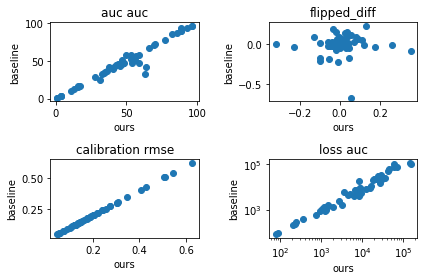

In [15]:
r = results

R, C = 2, 2
plt.subplot(R, C, 1)
plt.title('auc auc')
plt.plot(r.cw_auc_auc_test, r.pe_auc_auc_test, 'o')
plt.xlabel('ours')
plt.ylabel('baseline')


plt.subplot(R, C, 2)
plt.title('flipped_diff')
plt.plot(r.cw_flipped_diff_test, r.pe_flipped_diff_test, 'o')
plt.xlabel('ours')
plt.ylabel('baseline')

plt.subplot(R, C, 3)
plt.title('calibration rmse')
plt.plot(r.cw_calibration_rmse_test, r.pe_calibration_rmse_test, 'o')
plt.xlabel('ours')
plt.ylabel('baseline')

plt.subplot(R, C, 4)
plt.title('loss auc')
plt.plot(r.cw_loss_auc_test, r.pe_loss_auc_test, 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('ours')
plt.ylabel('baseline')

plt.tight_layout()
plt.savefig(oj(results_dir, 'pmlb_results.pdf'))
plt.show()

# look at best dsets

In [18]:
r['auc_auc_diff'] = r.cw_auc_auc_test - r.pe_auc_auc_test

In [ ]:
r2 = r
r2 = r2.sort_values(by='auc_auc_diff', ascending=False)
r2.auc_auc_diff

In [26]:
print('\\begin{tabular}{l c c}')
print('Dataset\t&\tClass-weight uncertainty AUC\t&\tUncertainty entropy AUC \\\\')
print('\hline')
for i in range(10):
    row = r2.iloc[i]
    name = row.dset_name.replace("_", "\_")
    print(f'{name}\t&\t{row.cw_auc_auc_test:0.2f}\t&\t{row.pe_auc_auc_test:0.2f}\\\\')
print('\end{tabular}')

\begin{tabular}{l c c}
Dataset	&	Class-weight uncertainty AUC	&	Uncertainty entropy AUC \\
\hline
hypothyroid	&	63.41	&	33.22\\
dis	&	63.97	&	42.23\\
Hill\_Valley\_without\_noise	&	58.67	&	47.61\\
buggyCrx	&	31.65	&	24.41\\
flare	&	53.95	&	47.75\\
coil2000	&	55.83	&	51.72\\
credit-g	&	45.26	&	42.90\\
pima	&	40.73	&	39.69\\
GAMETES\_Epistasis\_2-Way\_20atts\_0.4H\_EDM-1\_1	&	58.98	&	58.08\\
liver-disorder	&	11.23	&	10.43\\
\end{tabular}
